# Цель лабораторной работы

Изучение различных методов визуализация данных и создание истории на основе данных.

# Задание:

1. Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.

2. Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

3. Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:

    - История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
    - На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
    - Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
    - Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
    - История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

4. Сформировать отчет и разместить его в своем репозитории на github.


# Ход выполнение работы

## Текстовое описфние набора данных

Извлечение было выполнено Барри Беккером из базы данных переписи населения 1994 года. Набор достаточно чистых записей был извлечен с использованием следующих условий: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). 

Информация об атрибутах:

1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt(final weight): continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Основные характеристики набора данных

### Импортирование необходимых библиотек

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Импортирование необходимого набора данных

In [60]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', index_col=False)

df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income_less_than_50K']

### Основная информация о наборе данных

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   32560 non-null  int64 
 1   workclass             32560 non-null  object
 2   fnlwgt                32560 non-null  int64 
 3   education             32560 non-null  object
 4   education_num         32560 non-null  int64 
 5   marital_status        32560 non-null  object
 6   occupation            32560 non-null  object
 7   relationship          32560 non-null  object
 8   race                  32560 non-null  object
 9   sex                   32560 non-null  object
 10  capital_gain          32560 non-null  int64 
 11  capital_loss          32560 non-null  int64 
 12  hours_per_week        32560 non-null  int64 
 13  native_country        32560 non-null  object
 14  income_less_than_50K  32560 non-null  object
dtypes: int64(6), object(9)
memory usage:

In [45]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_less_than_50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Простая обработка набора данных. Удаление элементов с отсутствующими данными.

In [46]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   32560 non-null  int64 
 1   workclass             32560 non-null  object
 2   fnlwgt                32560 non-null  int64 
 3   education             32560 non-null  object
 4   education_num         32560 non-null  int64 
 5   marital_status        32560 non-null  object
 6   occupation            32560 non-null  object
 7   relationship          32560 non-null  object
 8   race                  32560 non-null  object
 9   sex                   32560 non-null  object
 10  capital_gain          32560 non-null  int64 
 11  capital_loss          32560 non-null  int64 
 12  hours_per_week        32560 non-null  int64 
 13  native_country        32560 non-null  object
 14  income_less_than_50K  32560 non-null  object
dtypes: int64(6), object(9)
memory usage:

### Информация о карьере

<AxesSubplot:>

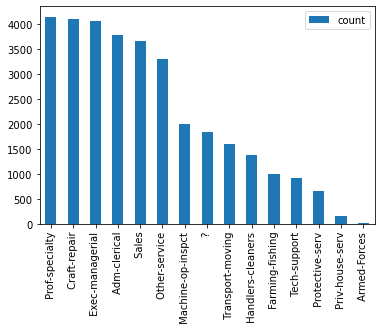

In [104]:
occupation = pd.value_counts(df.occupation)
occupation = pd.DataFrame(occupation)
occupation.columns = ['count']
occupation.plot.bar()

array([<AxesSubplot:ylabel='count'>], dtype=object)

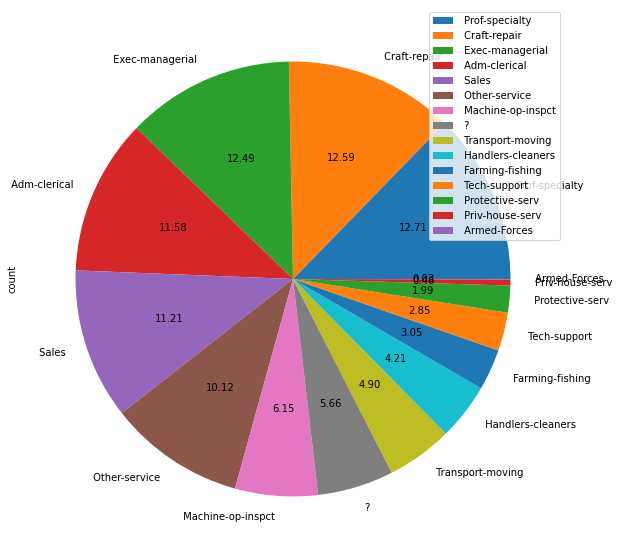

In [48]:
occupation.plot.pie(subplots=True,autopct='%.2f',figsize=(10,10))

### Информация об образовании

#### Время обучения, сгруппированное по родной стране или региону

Уровень образования людей из разных стран или регионов сильно различается.

<AxesSubplot:title={'center':'education_num'}, xlabel='native_country'>

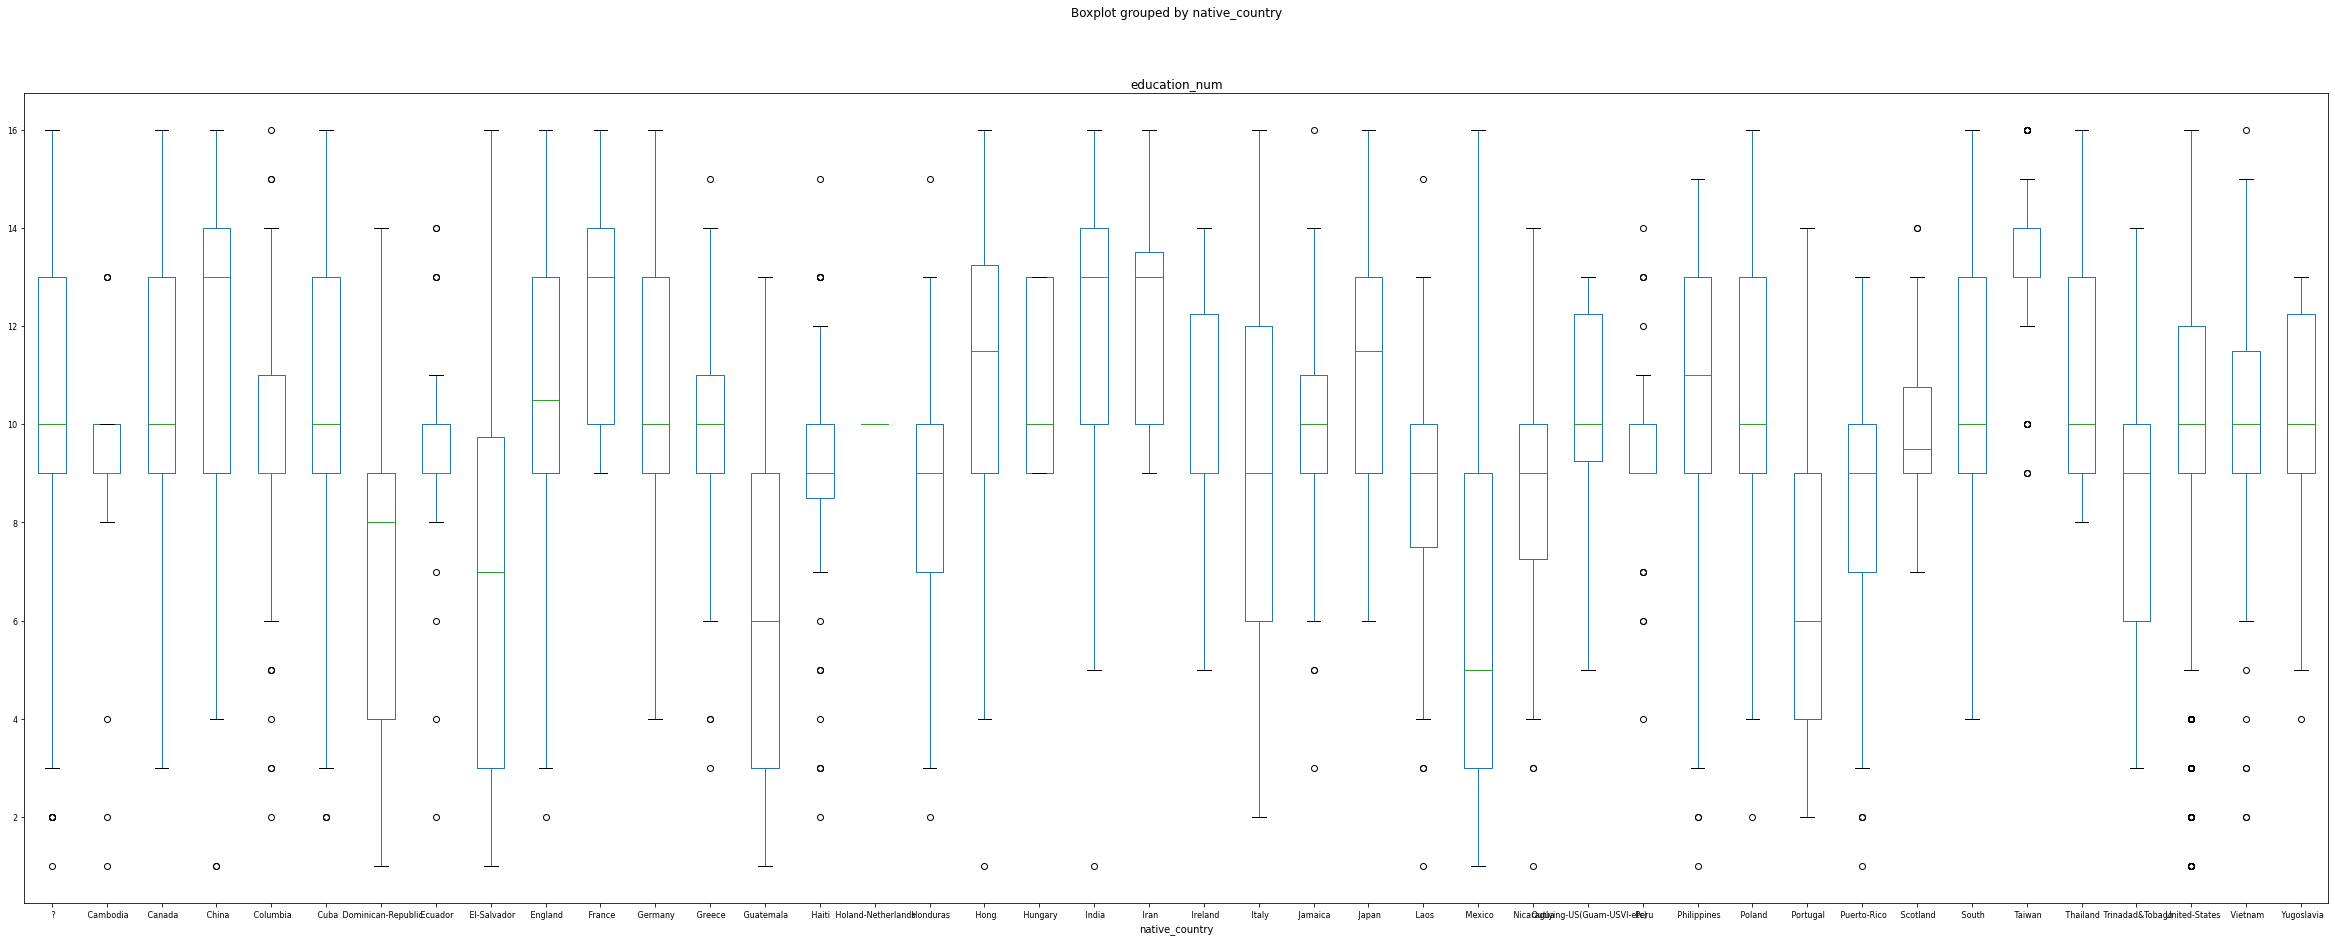

In [49]:
# Group by native country or region
df.boxplot(column='education_num',by='native_country',fontsize=8,grid=False,figsize=(40,15))

#### Время обучения, сгруппированное по полу

Среднее время обучения примерно одинаково для обоих полов. Однако мужчины чаще получают образование дольше.

<AxesSubplot:title={'center':'education_num'}, xlabel='sex'>

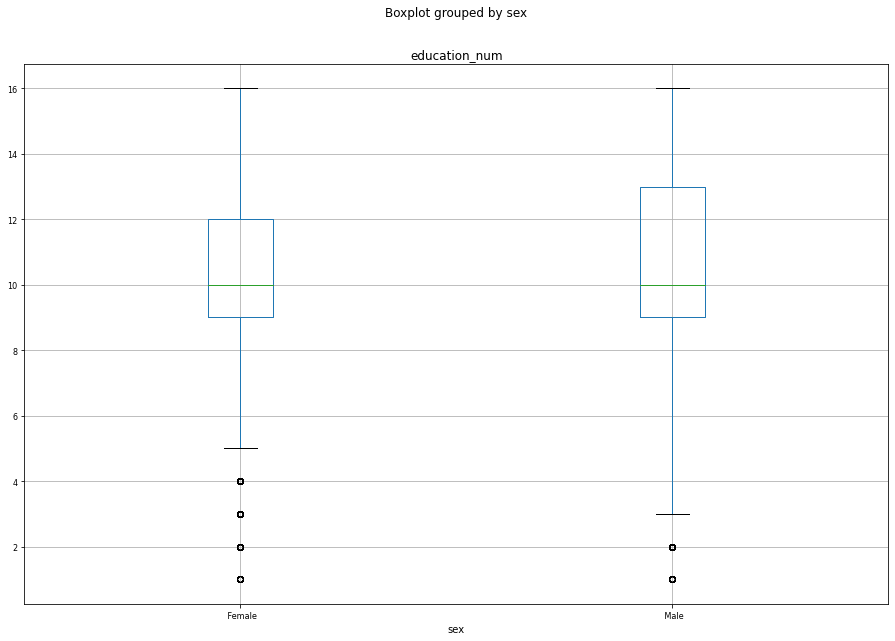

In [50]:
df.boxplot(column='education_num',by='sex',fontsize=8,grid=True,figsize=(15,10))

#### Время обучения, сгруппированное по расам

Белые и азиаты получают образование дольше.

<AxesSubplot:title={'center':'education_num'}, xlabel='race'>

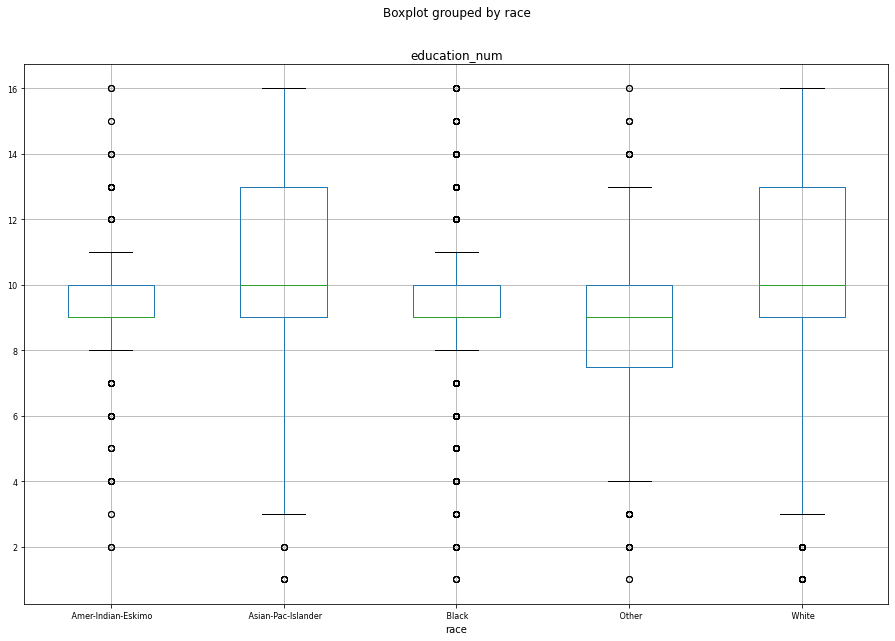

In [51]:
df.boxplot(column='education_num',by='race',fontsize=8,grid=True,figsize=(15,10))

### Информация о рабочем времени

Взаимосвязь между рабочим временем и временем обучения

<AxesSubplot:xlabel='education_num', ylabel='hours_per_week'>

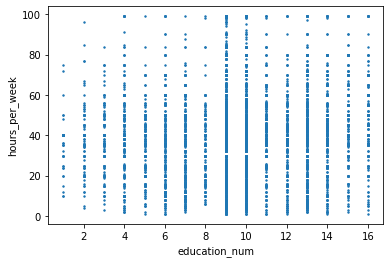

In [52]:
df.plot.scatter(x='education_num',y='hours_per_week',s=2)

Корреляция между временем обучения и рабочим временем слабая.

### Информация о доходах

#### Доходы людей разных профессий

Люди следующих двух профессий чаще зарабатывают более $50 000:
Exec-managerial, Prof-specialty.

<AxesSubplot:xlabel='occupation'>

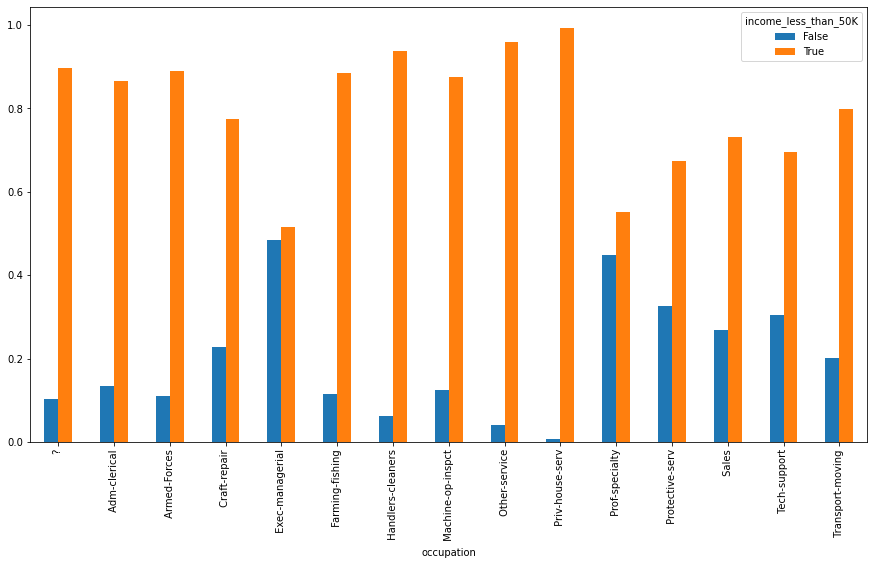

In [102]:
df2 = pd.DataFrame((df['occupation'],df['income_less_than_50K'].str.contains('<=50K'))).T

df2 = pd.DataFrame(df2.groupby('occupation').value_counts('income_less_than_50K',normalize=True)).reset_index()
df2.columns = ['occupation','income_less_than_50K','income_less_than_50K_percentage']
df2 = df2.pivot('occupation','income_less_than_50K','income_less_than_50K_percentage')
df2.plot.bar(figsize=(15,8))

#### Доход людей разного пола

Мужчины чаще, чем женщины, зарабатывают более $50 000.

<AxesSubplot:xlabel='sex'>

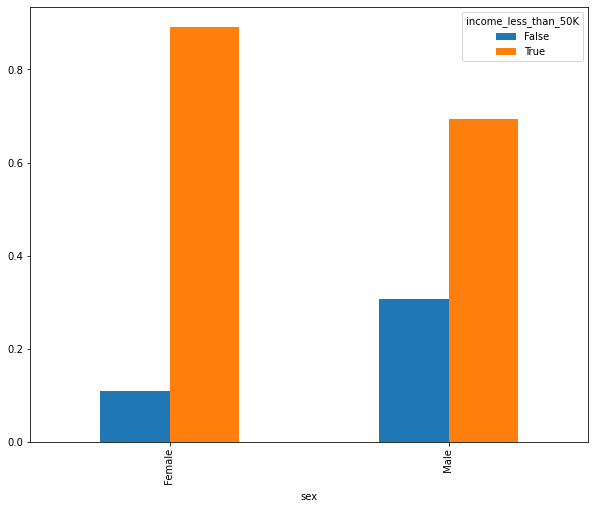

In [96]:
df3 = pd.DataFrame((df['sex'],df['income_less_than_50K'].str.contains('<=50K'))).T

df3 = pd.DataFrame(df3.groupby('sex').value_counts('income_less_than_50K',normalize=True)).reset_index()
df3.columns = ['sex','income_less_than_50K','income_less_than_50K_percentage']
df3 = df3.pivot('sex','income_less_than_50K','income_less_than_50K_percentage')
df3.plot.bar(figsize=(10,8))

# Список литературы

- [1] Гапанюк Ю. Е. Лабораторная работа «Разведочный анализ данных. Исследование и визуализация данных» [Электронный ресурс] // GitHub. –– 2019. –– Режим доступа: https://github.com/ugapanyuk/ml_course/wiki/LAB_EDA_VISUALIZATION (дата обращения: 13.02.2019)

- [2] https://archive.ics.uci.edu/ml/machine-learning-databases/adult/